<h1 style='color: green;'><center>Wheat Kernel Classification</center></h1>

<p><em>The problem statement in this machine learning (ML) problem is to classify seeds into their respective types based on their physical properties. Given a dataset containing various features such as area, perimeter, compactness, length of kernel, width of kernel, asymmetry coefficient, and length of kernel groove, the task is to develop a model that can accurately predict the type of seed.</em></p>

<p><strong>Objective:</strong></p><br>
<p>To develop a machine learning model that can classify different types of seeds based on their physical characteristics.</p>
<p>This dataset containing the following features for each seed:</p>
<ul>
<li>Area:<br><em>This refers to the surface area of the seed. It is usually measured in square units and gives an idea of the overall size of the seed.</em></li><br>

<li>Perimeter: <br> <em>This is the length of the boundary of the seed. It is measured in linear units and helps in understanding the seed's shape and size.</em></li><br>

<li>Compactness: <br> <em>Compactness is a derived feature that provides a measure of how closely packed the seed's shape is.</em></li><br>

<li>Length of Kernel: <br> <em>This is the longest dimension of the seed's kernel (the edible part inside the seed). It is measured in linear units.</em></li><br>

<li>Width of Kernel:<br> <em>This is the width of the seed's kernel at its widest point, measured in linear units.</em></li><br>

<li>Asymmetry Coefficient<: <br> <em>This feature measures the asymmetry of the seed's shape. It indicates how symmetrical the seed is. A value of zero indicates perfect symmetry, while higher values indicate greater asymmetry.</em></li><br>

<li>Length of Kernel Groove: <br> <em>This is the length of the groove or indentation that runs along the kernel. It is also measured in linear units and provides additional shape information.</em></li><br>

</ul>
<p>Output: The predicted seed type for each input sample. Seed types are Kama, Rosa, Canadian</p>
<ul>
<li>Kama: Represented by the value 1 in the target column.</li>
<li>Rosa: Represented by the value 2 in the target column.</li>
<li>Canadian: Represented by the value 3 in the target column.</li>
</ul>

<h1 style='color: green;'><center>Exploratory Data Analysis:</center></h1>

In [4]:
## importing requires python library 

import os
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [5]:
## Reading the dataset as pandas dataframe.

df=pd.read_csv('../Data/seed_dataset.csv')
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
## Dataset summary :-
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
## shape of dataset
df.shape

(210, 8)

In [8]:
## More information about the dataset:-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


There are total 8 columns, all are numerical value (as we replace the target columns value into numerical values), having no null values.

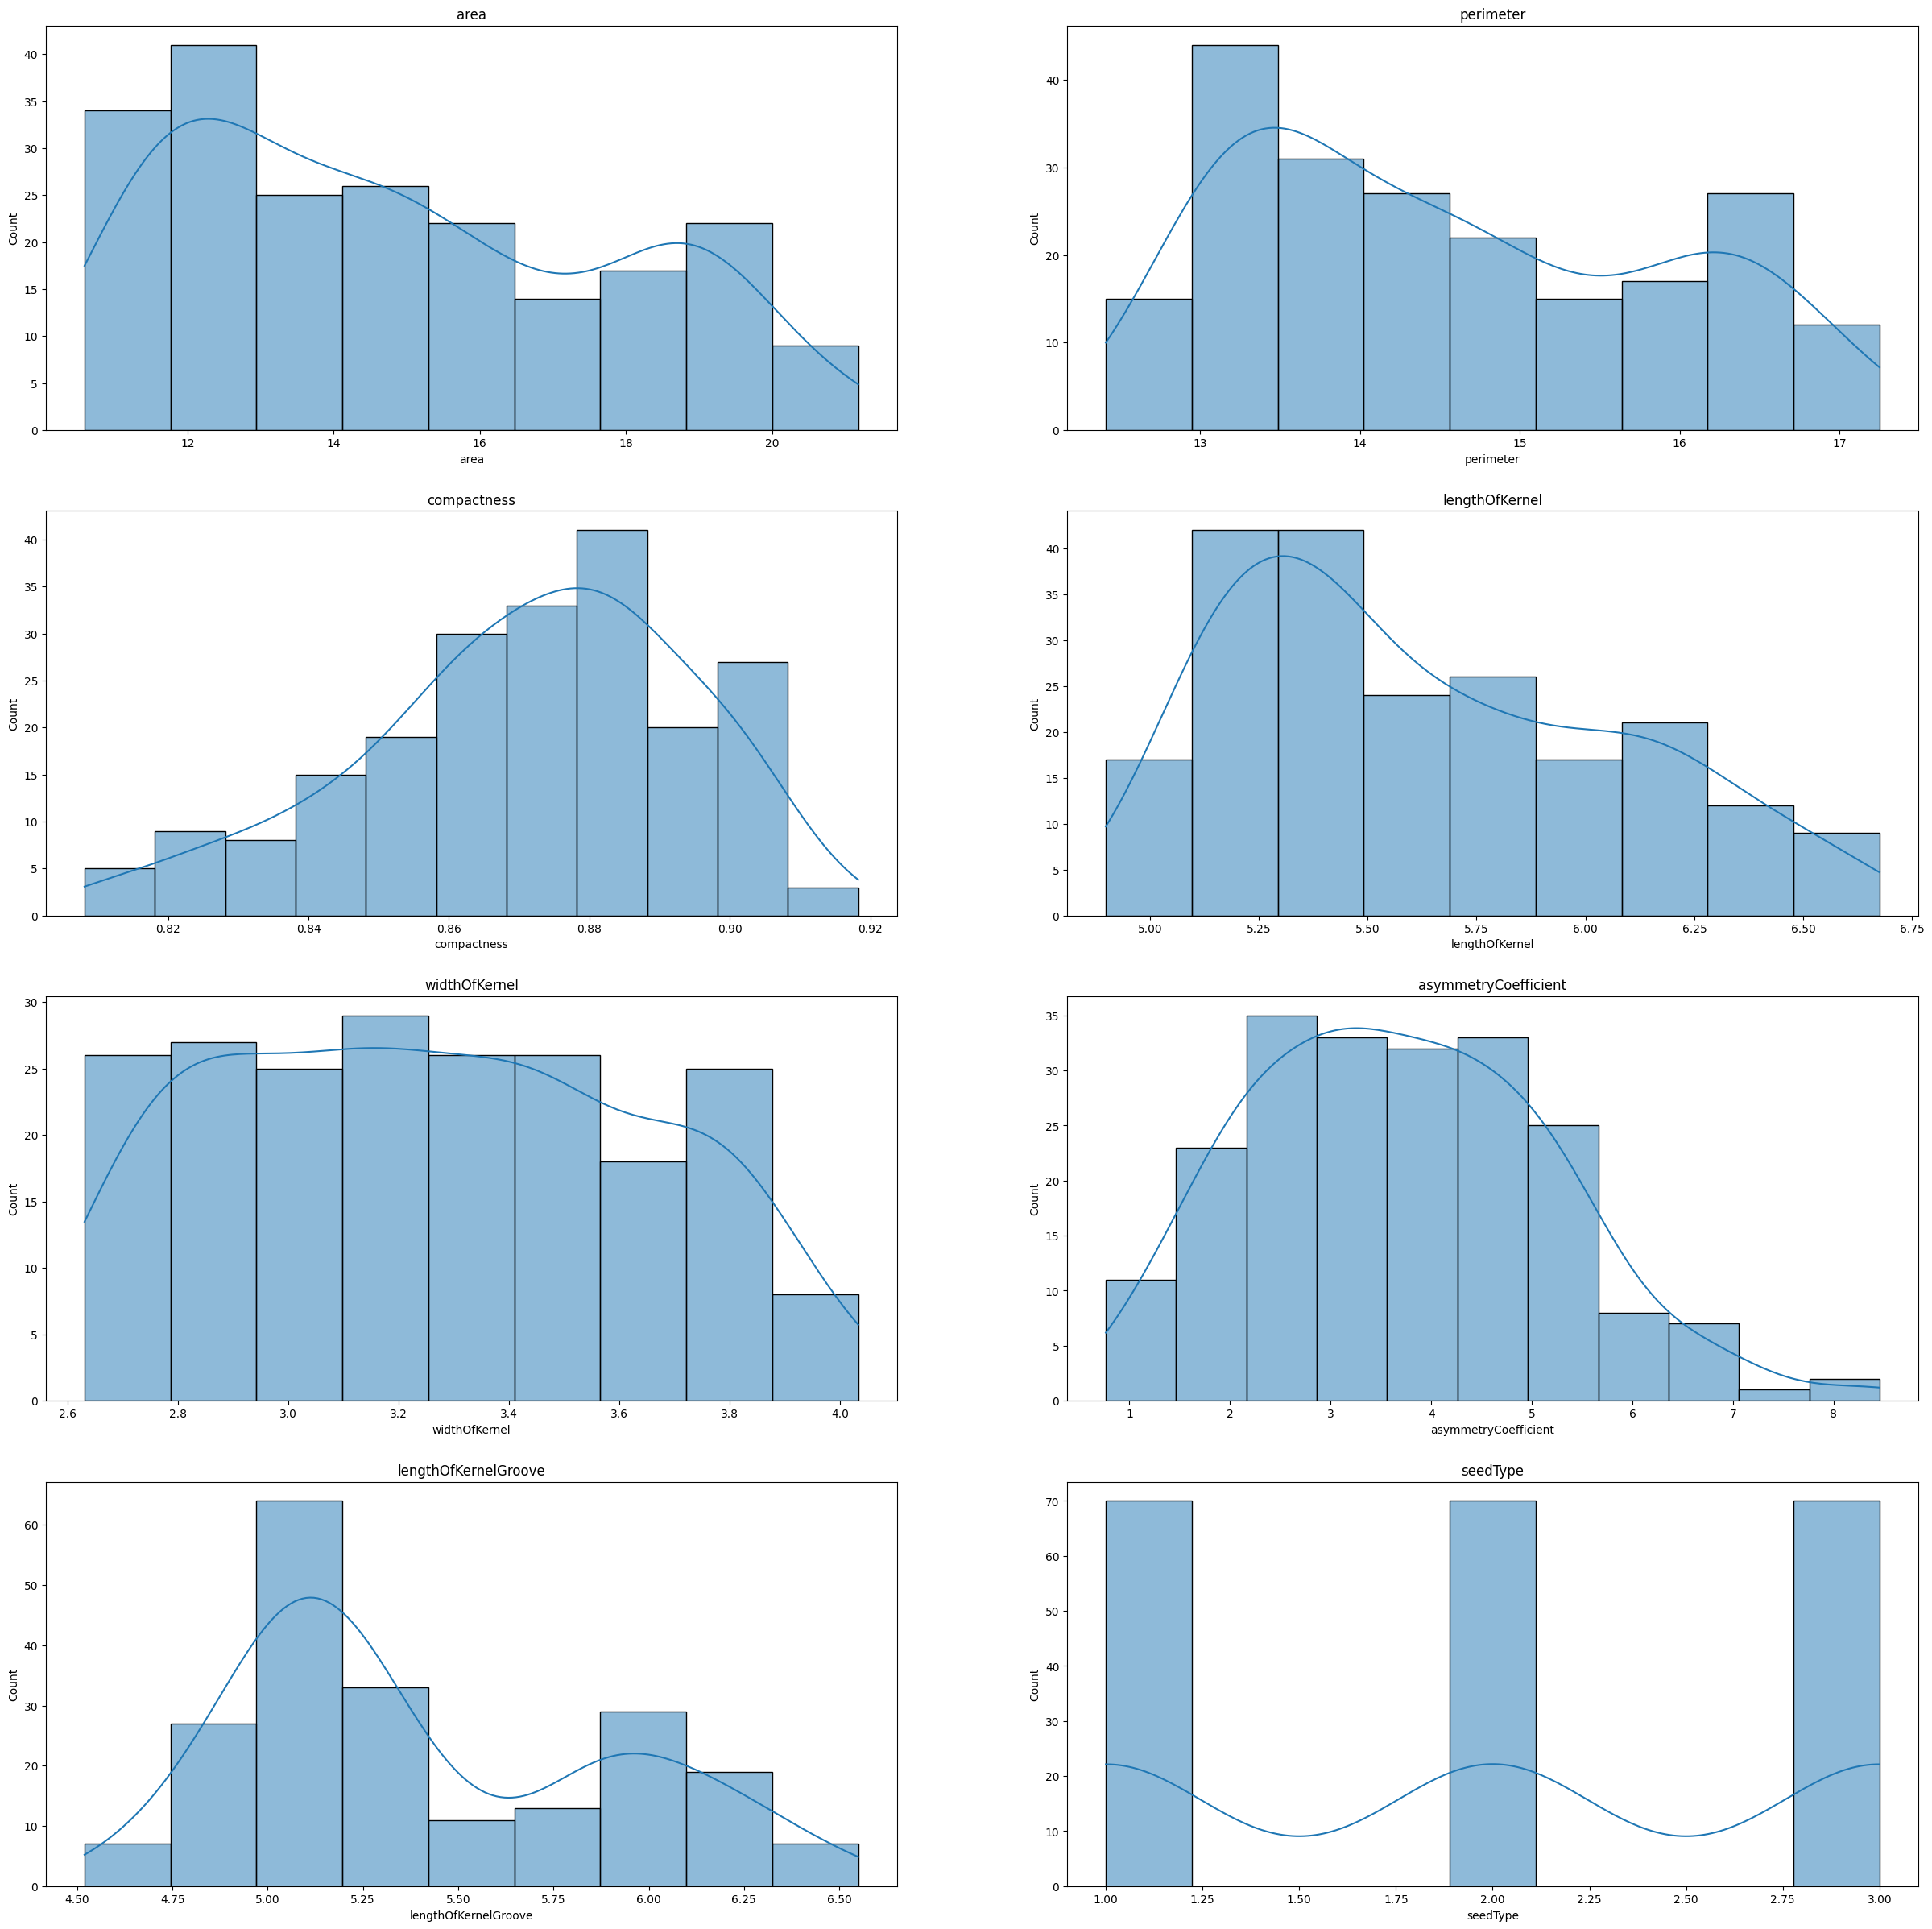

In [9]:
## observing the distribution of the features
plt.figure(figsize=(30,30))
n=1
for col in df.columns:
  plt.subplot(4,2,n)  
  sns.histplot(df[col], kde=True)
  plt.title(col)
  plt.xlabel(col)
  n+=1

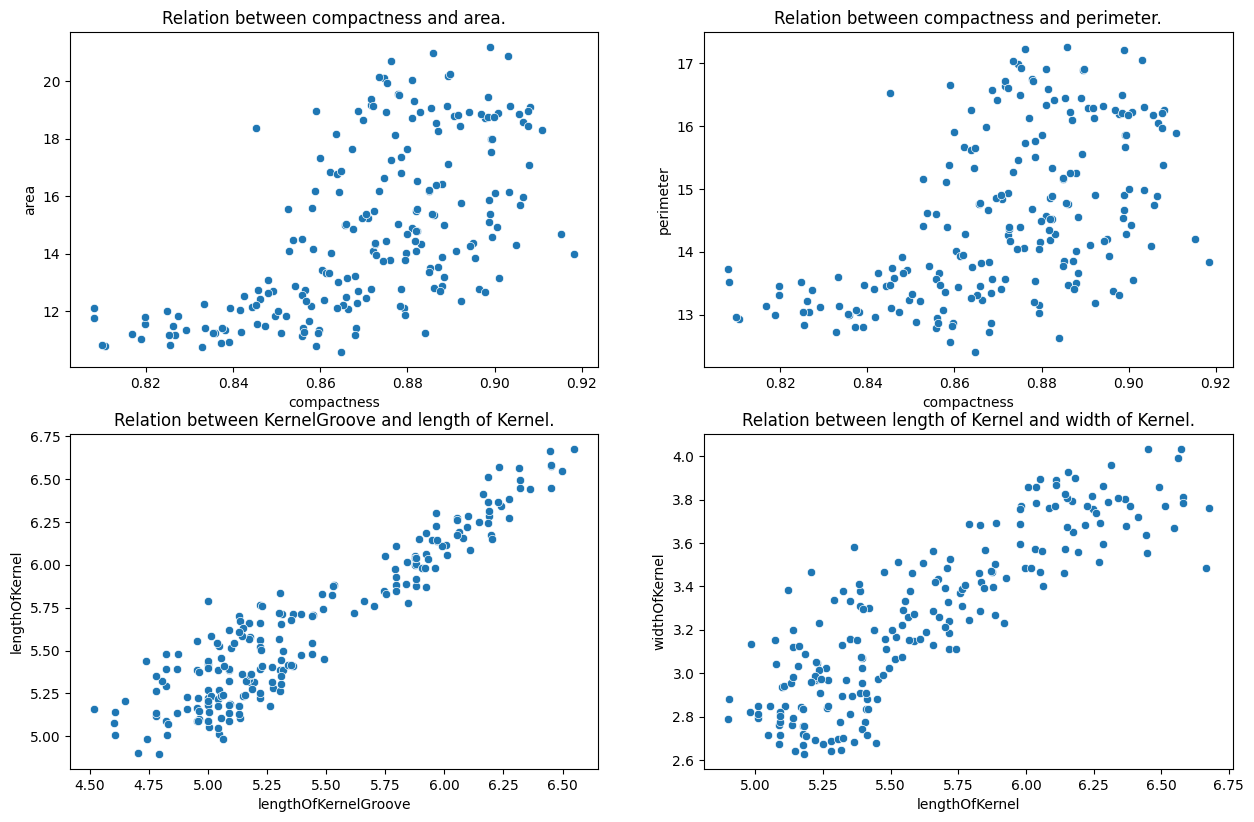

In [10]:
## spread of various features.

plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(df, x=df['compactness'], y=df['area'])
plt.title('Relation between compactness and area.')

plt.subplot(4,2,2)
sns.scatterplot(df, x=df['compactness'], y=df['perimeter'])
plt.title('Relation between compactness and perimeter.')

plt.subplot(4,2,3)
sns.scatterplot(df, x=df['lengthOfKernelGroove'], y=df['lengthOfKernel'])
plt.title('Relation between KernelGroove and length of Kernel.')

plt.subplot(4,2,4)
sns.scatterplot(df, x=df['lengthOfKernel'], y=df['widthOfKernel'])
plt.title('Relation between length of Kernel and width of Kernel.')
plt.show()

From the above graph we can observe that most of the features have almost same spread of data and have a linear relation with each other. 

In [11]:
## printing the correlation  values for above graph.
print(f'Correlation between area and compactness:', df['area'].corr(df['compactness']))
print(f'Correlation between perimeter and compactness:', df['perimeter'].corr(df['compactness']))
print(f'Correlation between length of kernel groove and length of kernel:', df['lengthOfKernelGroove'].corr(df['lengthOfKernel']))
print(f'Correlation between width of kernel and length of kernel:', df['widthOfKernel'].corr(df['lengthOfKernel']))



Correlation between area and compactness: 0.6082884150842176
Correlation between perimeter and compactness: 0.529243607401483
Correlation between length of kernel groove and length of kernel: 0.932806085941987
Correlation between width of kernel and length of kernel: 0.8604149377143466


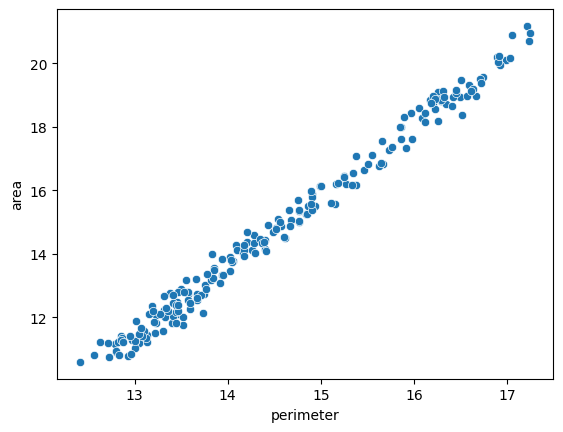

Correlation between area and permimeter: 0.9943409310122265


In [12]:
sns.scatterplot(df, x=df['perimeter'], y=df['area'])
plt.show()
print('Correlation between area and permimeter:',df['area'].corr(df['perimeter']))

As both area and perimeter are highly correlated, the best practice is to remove one feature form this data set to reduce the Redundancy, but it can only happen after discussing domain expert. But i this case: 
<li>Area might be more directly related to the size of the seed.</li> 
<li>Perimeter might be more relevant to the shape of the seed.</li>
So we try to build our model by including all input features.

<Axes: >

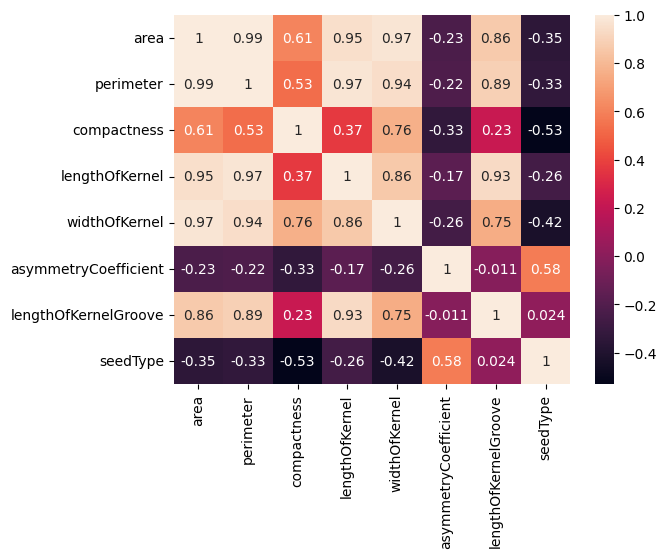

In [13]:
## heatmap to clear sight for correlation observation

sns.heatmap(data=df.corr(), annot=True)

from the above heatmap it observed that many features are highly correlated with other features.

<h1 style='color: green;'><center>Model Creation and selection</center></h1>

In [23]:
## importing library

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data=pd.read_csv('../Data/seed_dataset.csv')

X=data.iloc[:,:-1]
y=data['seedType']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}
# Evaluate models using cross-validation and print additional metrics
for name, model in models.items():
    print(f"\n{name}:")
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"  Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate additional metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print the metrics
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print("  Confusion Matrix:")
    print(conf_matrix)



Logistic Regression:
  Cross-Validation Accuracy: 0.9230 (+/- 0.0349)
  Test Accuracy: 0.9048
  Precision: 0.9048
  Recall: 0.9048
  F1-score: 0.9048
  Confusion Matrix:
[[ 9  0  2]
 [ 0 14  0]
 [ 2  0 15]]

Random Forest:
  Cross-Validation Accuracy: 0.9289 (+/- 0.0296)
  Test Accuracy: 0.8571
  Precision: 0.8816
  Recall: 0.8571
  F1-score: 0.8586
  Confusion Matrix:
[[10  0  1]
 [ 0 14  0]
 [ 5  0 12]]

SVM:
  Cross-Validation Accuracy: 0.8988 (+/- 0.0149)
  Test Accuracy: 0.9048
  Precision: 0.9074
  Recall: 0.9048
  F1-score: 0.9053
  Confusion Matrix:
[[ 9  0  2]
 [ 1 13  0]
 [ 1  0 16]]


<p>Form the above models SVC and Logistic Regression perfome very well.</p>

<h1 style='color: green;'><center>HyperPerimeter Tuning</center></h1>

<h1>For SVC model</h1>

In [28]:
from sklearn.model_selection import GridSearchCV

params_SVC = {
    'C': [0.1, 1, 10, 100],           # Penalty parameter C of the error term
    'kernel': ['linear', 'rbf'],      # Kernel type ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
    'gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'degree': [3, 5, 7],              # Degree of the polynomial kernel function ('poly' only)
    'coef0': [0.0, 1.0],              # Independent term in kernel function ('poly' and 'sigmoid' only)
    'shrinking': [True, False],       # Whether to use the shrinking heuristic
    'probability': [True, False],     # Whether to enable probability estimates
    'decision_function_shape': ['ovr', 'ovo'],  # Decision function shape ('ovr' for one-vs-rest, 'ovo' for one-vs-one)
    'random_state': [None]            # Random seed
}

base_estimator_svc=SVC()

gridCV=GridSearchCV(estimator=base_estimator_svc, param_grid=params_SVC, cv=5)
model_svc_grid=gridCV.fit(X_train, y_train)

y_pred_by_gridCV=model_svc_grid.predict(X_test)

 # Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_by_gridCV)
precision = precision_score(y_test, y_pred_by_gridCV, average='weighted')
recall = recall_score(y_test, y_pred_by_gridCV, average='weighted')
f1 = f1_score(y_test, y_pred_by_gridCV, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_by_gridCV)
    
# Print the metrics
print(f"  Test Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print("  Confusion Matrix:")
print(conf_matrix)

  Test Accuracy: 0.9762
  Precision: 0.9782
  Recall: 0.9762
  F1-score: 0.9763
  Confusion Matrix:
[[11  0  0]
 [ 0 14  0]
 [ 1  0 16]]


<h1>For Logistic Regression</h1>

In [29]:
from sklearn.model_selection import GridSearchCV

params_LG = {
    'penalty': ['l1', 'l2'],                  # Penalty norm ('l1' or 'l2')
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],          # Algorithm to use in optimization ('liblinear' for small datasets, 'saga' for large datasets)
    'multi_class': ['ovr', 'multinomial'],    # Strategy for handling multiple classes ('ovr' for one-vs-rest, 'multinomial' for multinomial loss)
    'max_iter': [100, 200, 300],              # Maximum number of iterations taken for the solvers to converge
    'random_state': [None]                    # Random seed
}
base_estimator_LG=LogisticRegression()

gridLG=GridSearchCV(estimator=base_estimator_LG, param_grid=params_LG, cv=5)
model_svc_gridLG=gridLG.fit(X_train, y_train)

y_pred_by_gridLG=model_svc_gridLG.predict(X_test)

 # Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_by_gridLG)
precision = precision_score(y_test, y_pred_by_gridLG, average='weighted')
recall = recall_score(y_test, y_pred_by_gridLG, average='weighted')
f1 = f1_score(y_test, y_pred_by_gridLG, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_by_gridLG)
    
# Print the metrics
print(f"  Test Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print("  Confusion Matrix:")
print(conf_matrix)

  Test Accuracy: 0.9762
  Precision: 0.9782
  Recall: 0.9762
  F1-score: 0.9763
  Confusion Matrix:
[[11  0  0]
 [ 0 14  0]
 [ 1  0 16]]


In [31]:
gridCV.best_estimator_

SVC(C=100, kernel='linear', probability=True)

In [30]:
gridLG.best_estimator_

LogisticRegression(C=10, max_iter=200, multi_class='ovr', penalty='l1',
                   solver='liblinear')

<h1 style='color: green;'><center>conclusion </center></h1>
<p><em>Both the mode SVC and Logistic Regression have almost same output and accuracy, so we can choose any one of them. And we make the final model with <strong>SVC</strong></em></p>